# Proyek predictive analytic

- **Nama:** Naufal Dzakwan Zakianto
- **Email:** naufal.dzakwann28@gmail.com
- **ID Dicoding:** MC012D5Y2416

# Problem statement

Saat ini properti terutama rumah adalah kebutuhan yang dibutuhkan oleh semua orang, namun harga rumah yang bervariasi tentunya menjadi kesulitan bagi pembeli maupun penjual dalam menentukan harga yang ideal, memprediksi harga perumahan secara akurat juga sangat penting untuk investasi real estate, pembangunan perkotaan, dan pengambilan keputusan konsumen. Maka dari itu, proyek ini bertujuan untuk membangun model regresi yang dapat memperkirakan harga jual rumah berdasarkan berbagai fitur terkait properti dan lokasi.

# Data understanding

Dataset yang digunakan bersumber dari situs kaggle yang dapat di akses di link berikut: https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction

Data tersebut berisi 500+ baris data yang terdiri dari rincian kolom sebagai berikut:

- Price: Harga rumah.
- Area: Total luas rumah dalam kaki persegi.
- Bedroom: Jumlah kamar tidur di rumah.
- Bathroom: Jumlah kamar mandi di rumah.
- Stories: Jumlah lantai di rumah.
- Main road: Apakah rumah terhubung ke jalan utama (Ya/Tidak).
- Guestroom: Apakah rumah memiliki kamar tamu (Ya/Tidak).
- Basement: Apakah rumah memiliki ruang bawah tanah (Ya/Tidak).
- Hot water heating: Apakah rumah memiliki sistem pemanas air panas (Ya/Tidak).
- Airconditioning: Apakah rumah memiliki sistem pendingin udara (Ya/Tidak).
- Parking: Jumlah tempat parkir yang tersedia di dalam rumah.
- Prefarea: Apakah rumah berada di area yang disukai (Ya/Tidak).
- Furnishing status: Status perabotan rumah (Sepenuhnya berperabotan, Semi-perabotan, Tidak berperabotan).

# Import Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import kagglehub
from sklearn.preprocessing import  OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer

# Data loading

In [ ]:
path = kagglehub.dataset_download("harishkumardatalab/housing-price-prediction")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/housing-price-prediction


In [ ]:
house = pd.read_csv(path+"/Housing.csv")

In [ ]:
house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Exploratory data analysis

Memeriksa deskripsi variabel dan mising value

In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
house.describe(include = 'all')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


**INSIGHT:**

Tidak ditemukan ke anehan dalam deskripsi variabel, semua nilai yang ada pada variabel terlihat wajar, tidak ada error value serta tidak ditemukan missing value.

Memeriksa outlier

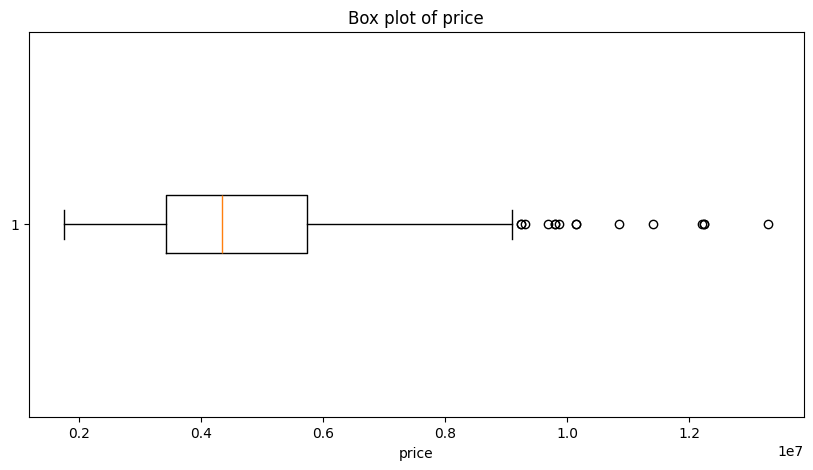

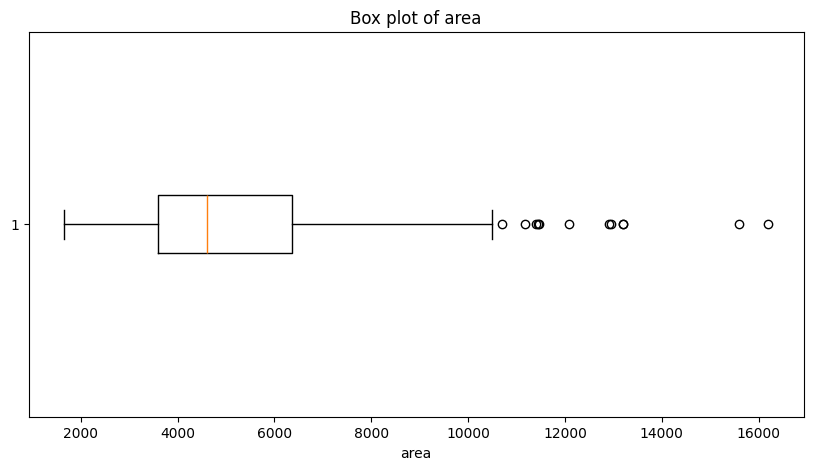

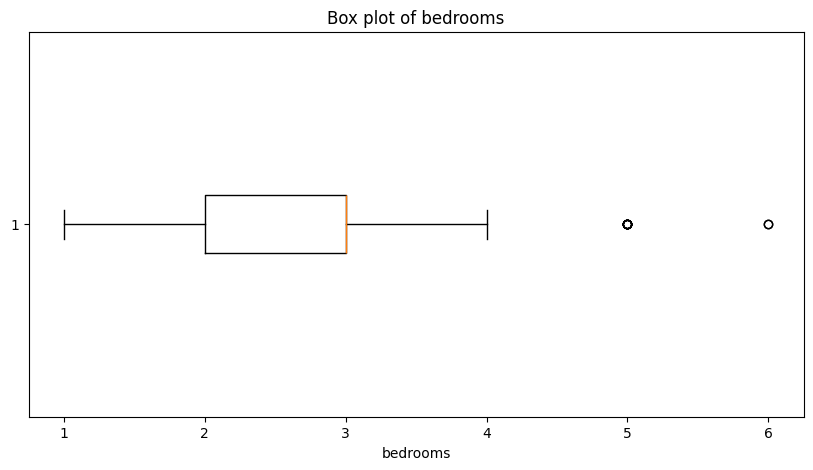

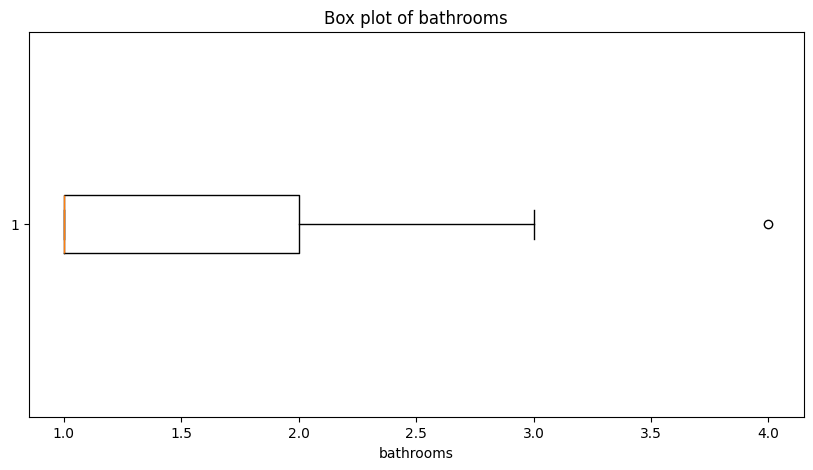

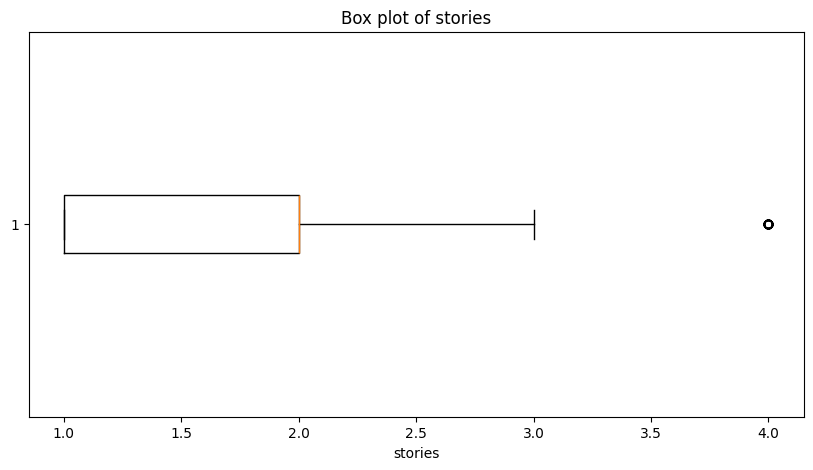

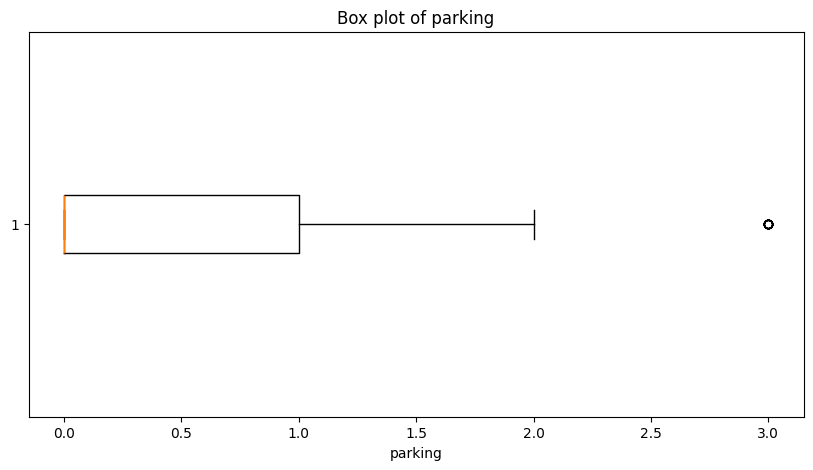

In [ ]:
# Fungsi deteksi outlier IQR method
def detect_outliers_iqr(house):
    outliers = pd.DataFrame()
    for column in house.select_dtypes(include=['int64']).columns:
        Q1 = house[column].quantile(0.25)
        Q3 = house[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_in_column = house[(house[column] < lower_bound) | (house[column] > upper_bound)]
        outliers = pd.concat([outliers, outliers_in_column])
    return outliers

# Deteksi outlier
outliers = detect_outliers_iqr(house)

# Visualisasi outlier
for column in house.select_dtypes(include=['int64']).columns:
    plt.figure(figsize=(10, 5))
    plt.boxplot(house[column], vert=False)
    plt.title(f'Box plot of {column}')
    plt.xlabel(column)
    plt.show()

INSIGHT:

Karena jumlah outliernya tidak terlalu banyak, dan dikhawatirkan outlier ini nantinya akan mengganggu proses pelatihan pada model, maka data yang mengandung outlier nantinya bisa dihapus menggunakan IQR method.

Univariate analysis fitur categorical

<ipython-input-165-bd6e4ca4a36a>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(idx, value, f'{percent[idx]:.1f}%', ha='center', va='bottom')


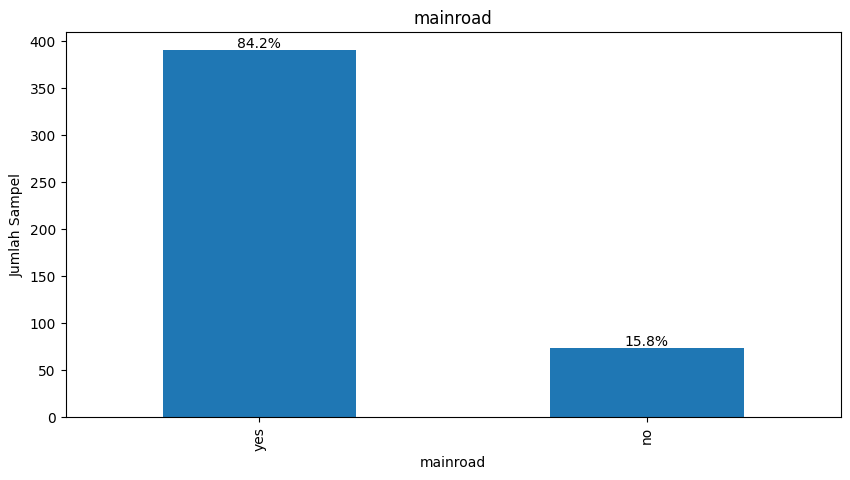

<ipython-input-165-bd6e4ca4a36a>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(idx, value, f'{percent[idx]:.1f}%', ha='center', va='bottom')


          jumlah sampel  persentase
mainroad                           
yes                 390        84.2
no                   73        15.8


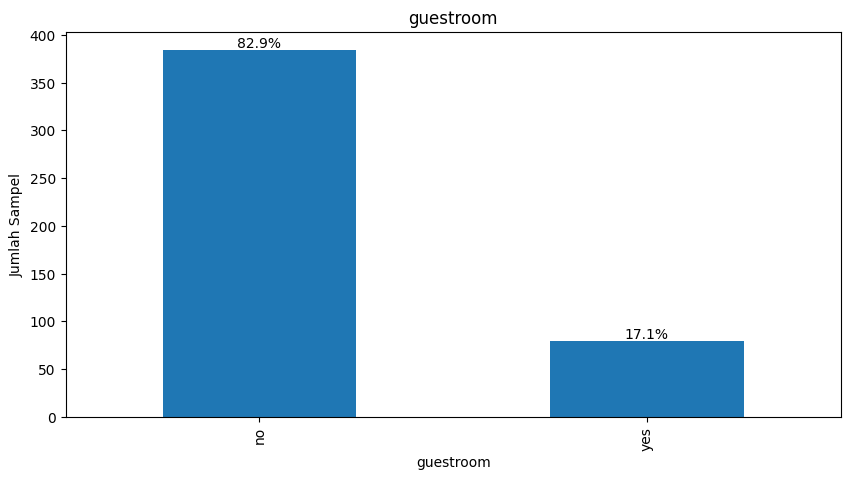

           jumlah sampel  persentase
guestroom                           
no                   384        82.9
yes                   79        17.1


<ipython-input-165-bd6e4ca4a36a>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(idx, value, f'{percent[idx]:.1f}%', ha='center', va='bottom')


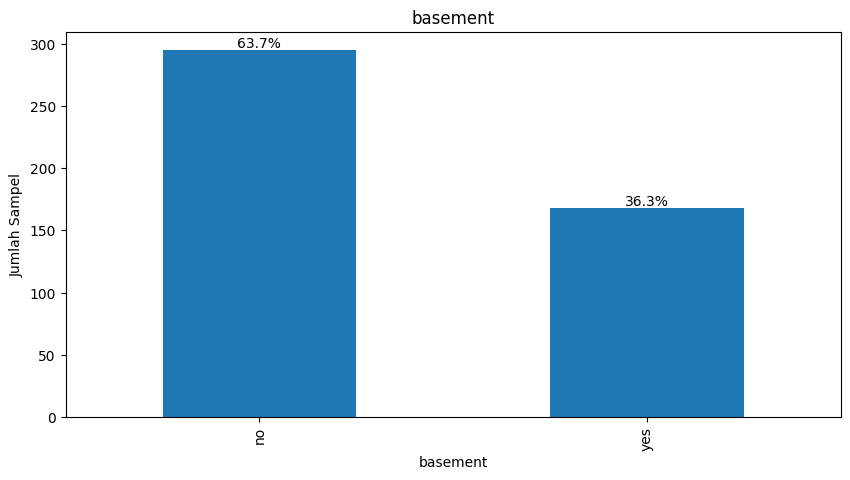

          jumlah sampel  persentase
basement                           
no                  295        63.7
yes                 168        36.3


<ipython-input-165-bd6e4ca4a36a>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(idx, value, f'{percent[idx]:.1f}%', ha='center', va='bottom')


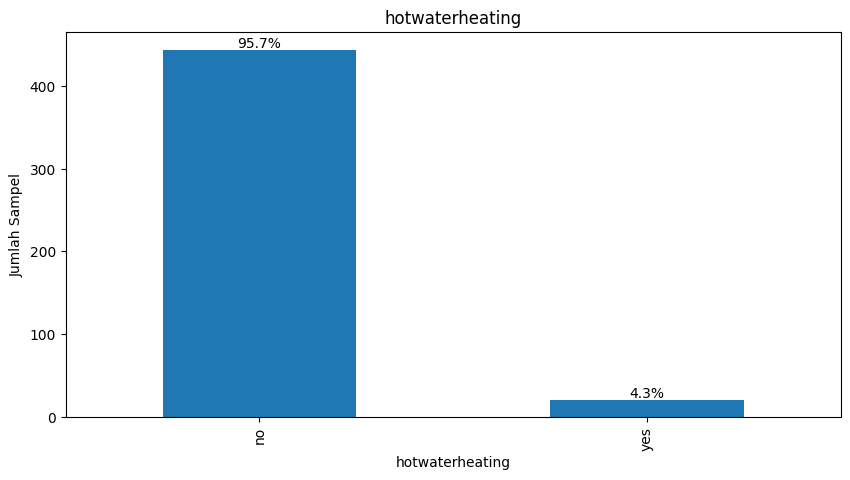

                 jumlah sampel  persentase
hotwaterheating                           
no                         443        95.7
yes                         20         4.3


<ipython-input-165-bd6e4ca4a36a>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(idx, value, f'{percent[idx]:.1f}%', ha='center', va='bottom')


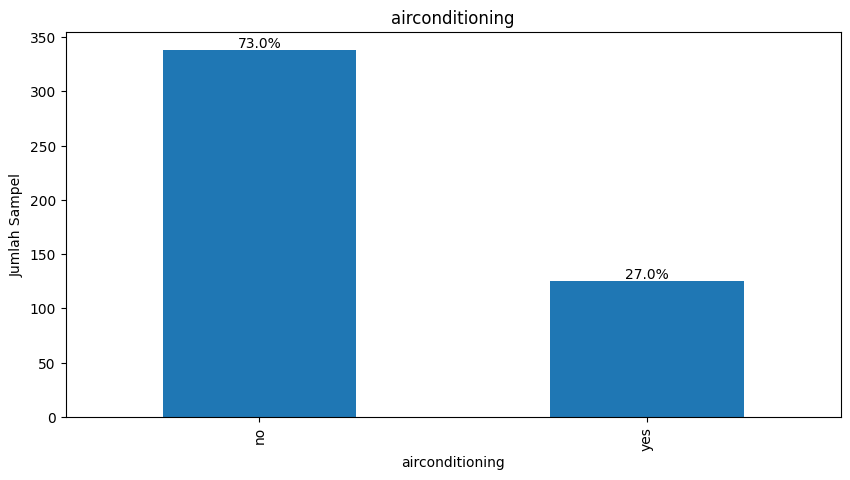

                 jumlah sampel  persentase
airconditioning                           
no                         338        73.0
yes                        125        27.0


<ipython-input-165-bd6e4ca4a36a>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(idx, value, f'{percent[idx]:.1f}%', ha='center', va='bottom')


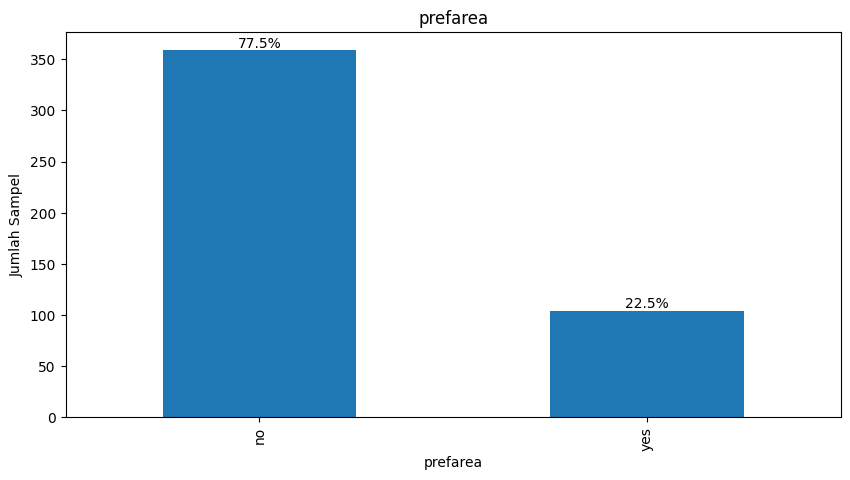

          jumlah sampel  persentase
prefarea                           
no                  359        77.5
yes                 104        22.5


<ipython-input-165-bd6e4ca4a36a>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(idx, value, f'{percent[idx]:.1f}%', ha='center', va='bottom')


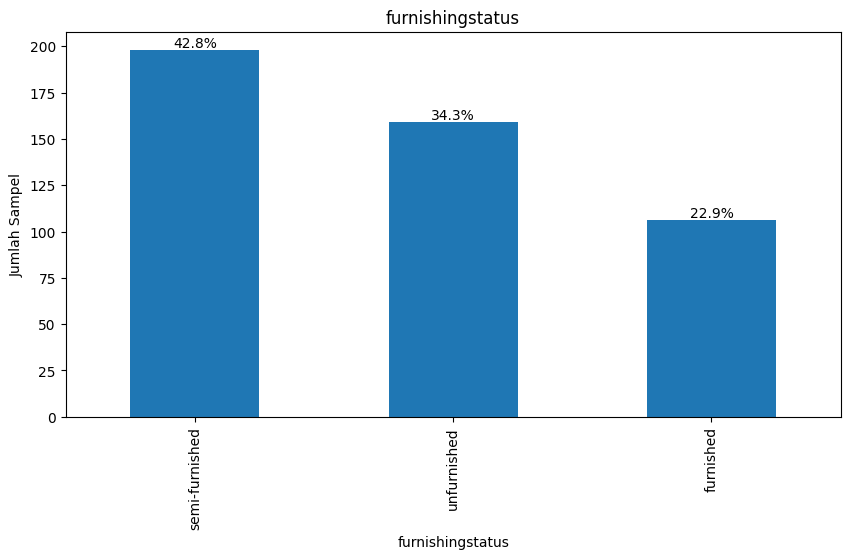

                  jumlah sampel  persentase
furnishingstatus                           
semi-furnished              198        42.8
unfurnished                 159        34.3
furnished                   106        22.9


In [ ]:

# Visualisasi presentase dari masing masing fitur categori
categorical_features = house.select_dtypes(include=['object']).columns

for feature in categorical_features:
    count = house[feature].value_counts()
    percent = 100 * house[feature].value_counts(normalize=True)
    dfc = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})

    # Plot bar chart
    plt.figure(figsize=(10, 5))
    count.plot(kind='bar', title=feature)

    # Anotasi presentase ke barchart
    for idx, value in enumerate(count):
        plt.text(idx, value, f'{percent[idx]:.1f}%', ha='center', va='bottom')

    plt.xlabel(feature)
    plt.ylabel('Jumlah Sampel')
    plt.show()

    # Print dataframe dengan jumlah dan presentase
    print(dfc)


INSIGHT:

Berdasarkan visualisasi, rumah yang ada pada dataset ini cenderung banyak yang berada di jalan utama. Meskipun demikian rumah-rumah tersebut didominasi oleh rumah yang tidak memiliki kamar tamu, basement, penghangat air, pendingin ruangan, serta area yang bukan favorit pembeli. Selain itu terdapat lebih banyak rumah yang semi furnished dan unfurnised dibandingkan full furnished.

Univariate analysis fitur numeric

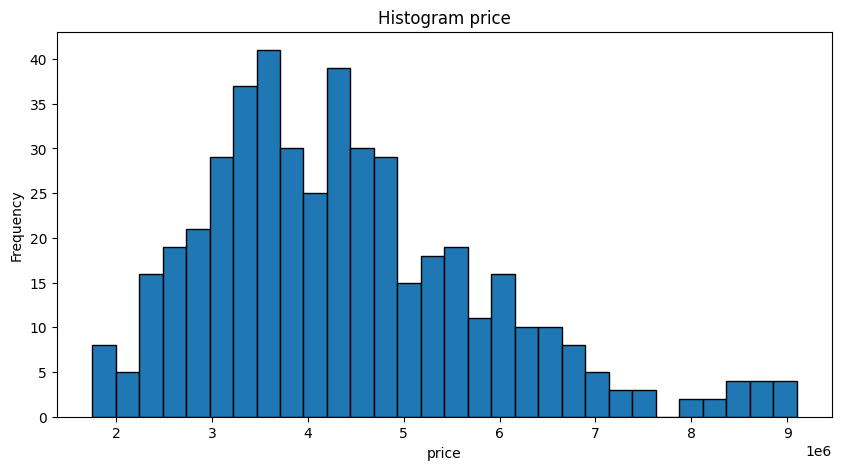

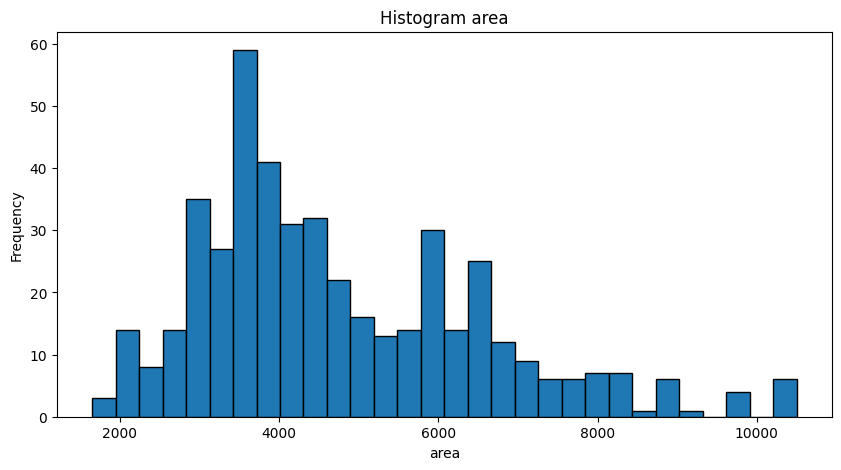

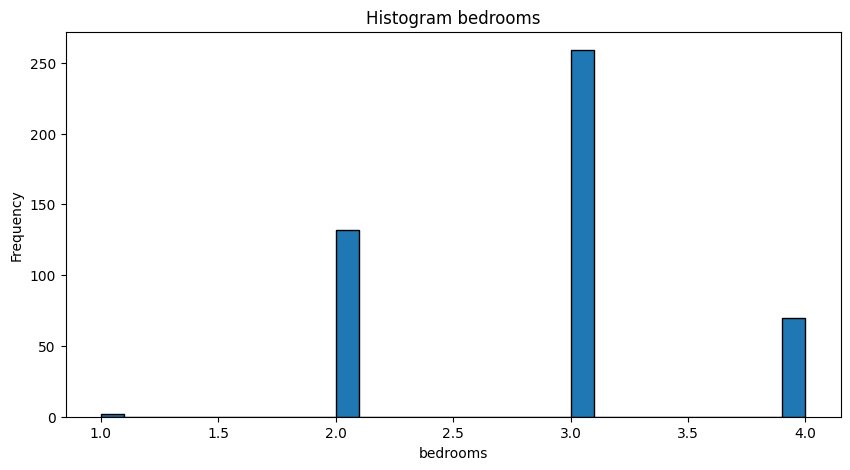

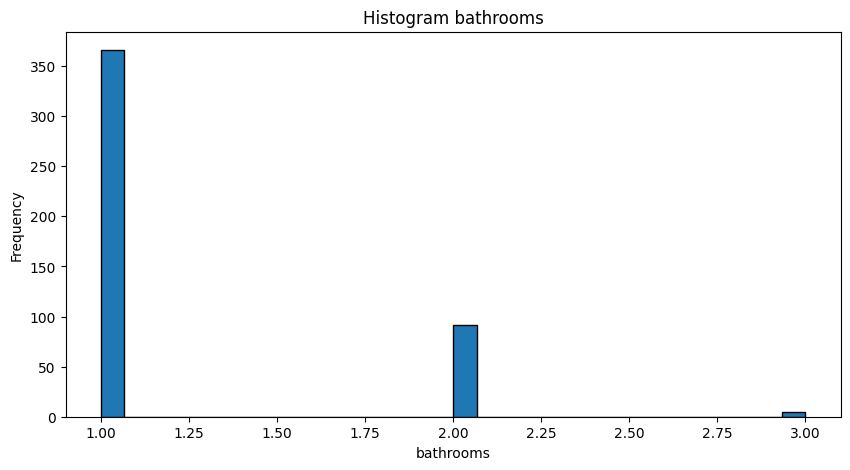

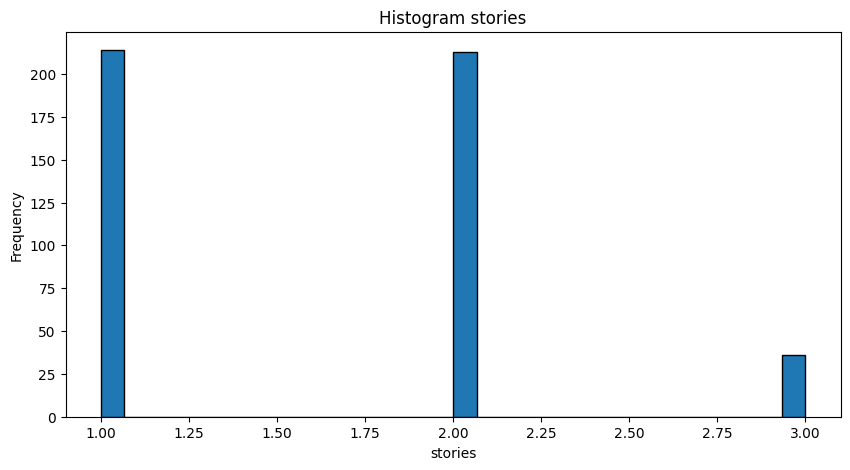

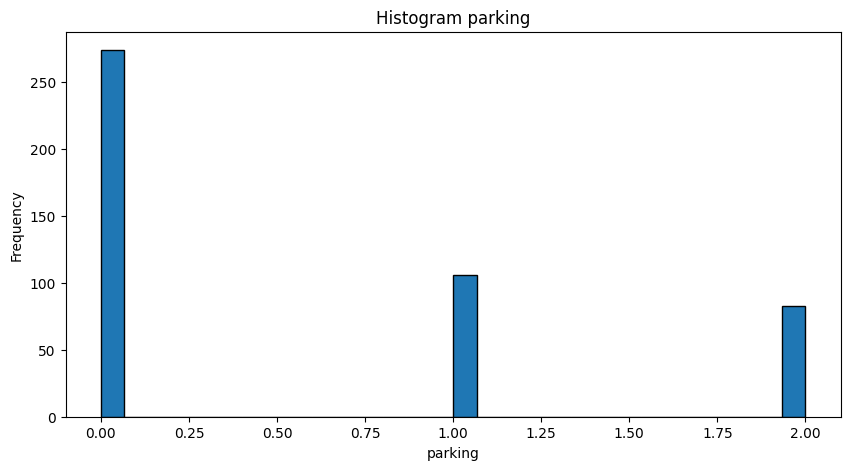

In [ ]:
# Visualisasi histogram dari masing masing fitur numeric
numerical_features = house.select_dtypes(include=['int64']).columns

for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    plt.hist(house[feature], bins=30, edgecolor='k')
    plt.title(f'Histogram {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

INSIGHT:

Berdasarkan histogram dapat diketahui bahwa kebanyakan rumah yang ada memiliki 3 kamar tidur, 1 kamar mandi, 1 lantai dan tidak punya tempat parkir. Selain itu bisa dilihat juga bahwa lebih banyak rumah yang memiliki luas area yang kecil sampai menangah yaitu berpusat di sekitar 3000-4000. Faktor-faktor tersebut mengakibatkan  harga rumah lebih banyak berada harga yang rendah, yaitu range 3 juta sampai 4 juta, (positif skewness) hal ini tentunya akan berimplikasi ke model nantinya.

Multivariate analysis fitur categorical

<ipython-input-167-f18a03141d34>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=house, palette="Set3")
<ipython-input-167-f18a03141d34>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=house, palette="Set3")
<ipython-input-167-f18a03141d34>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=house, palette="Set3")
<ipython-inpu

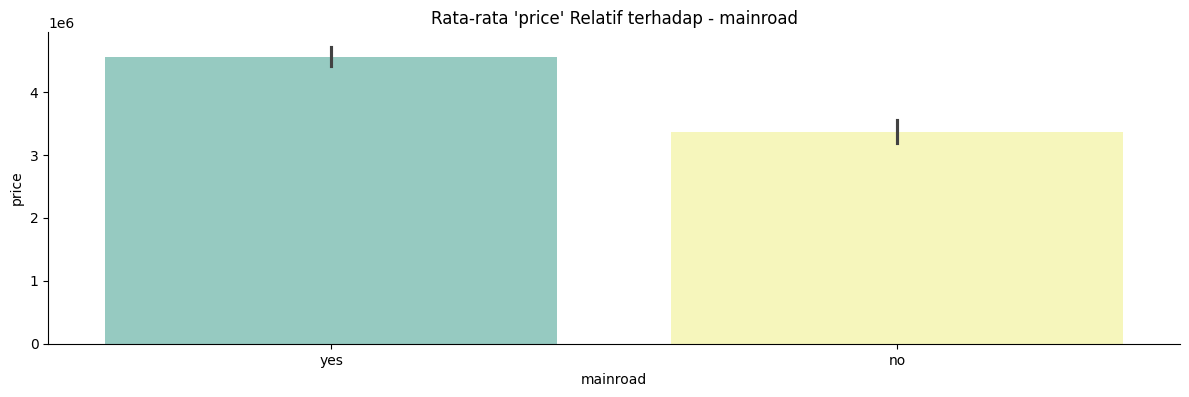

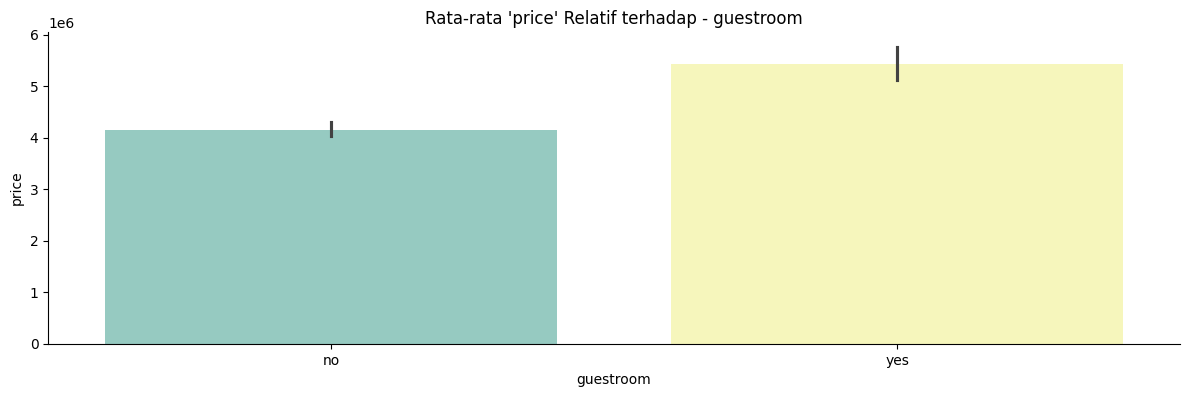

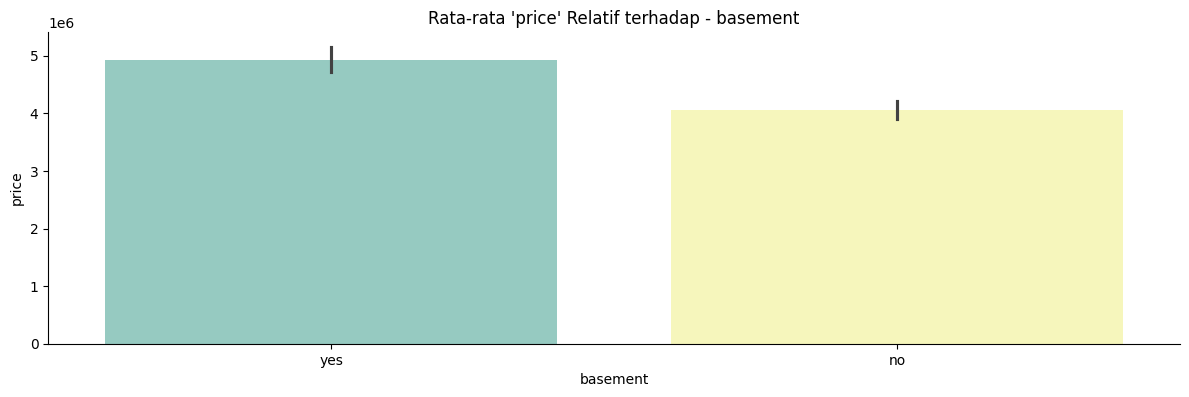

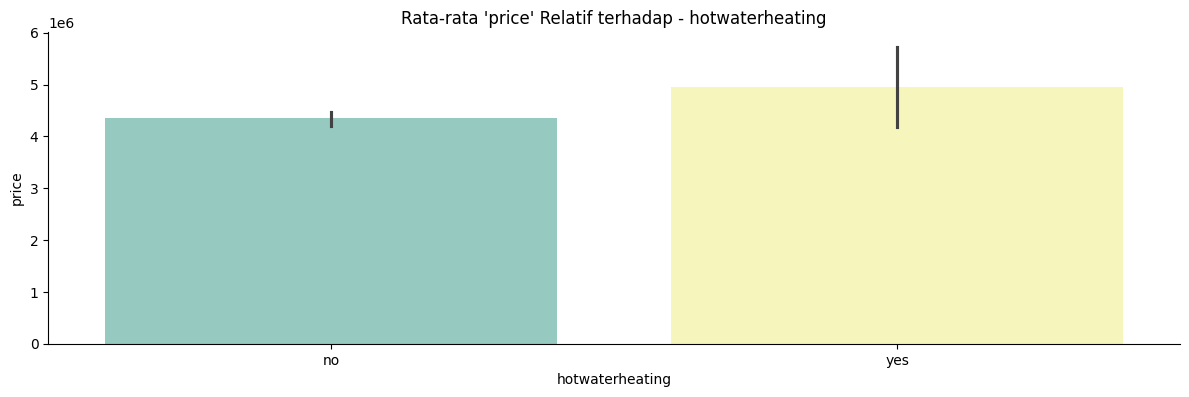

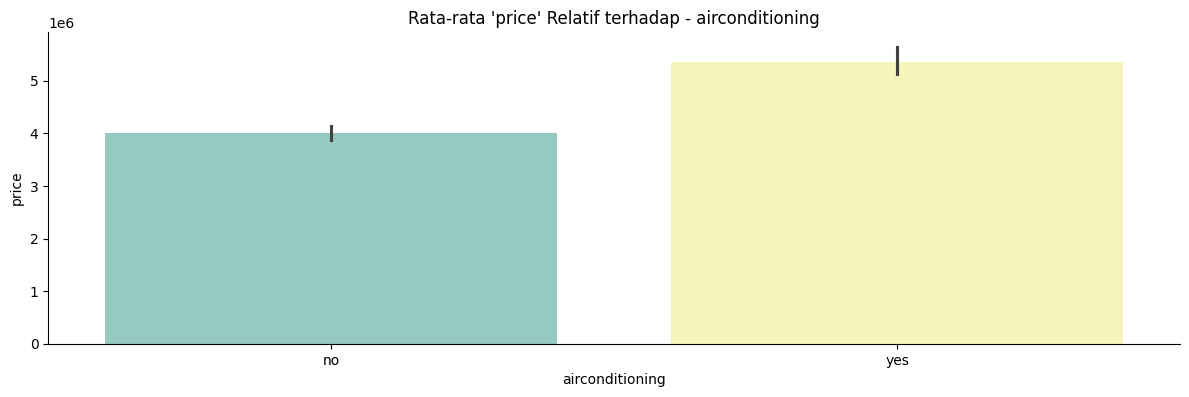

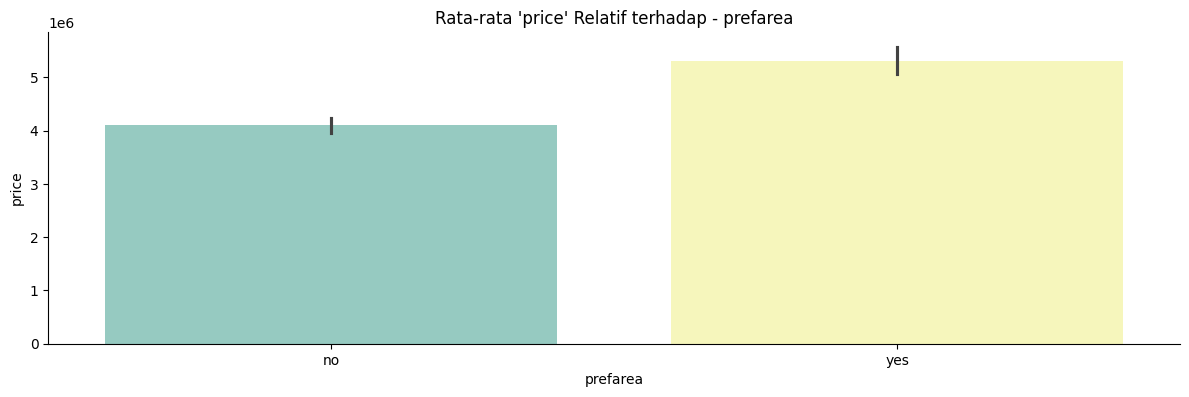

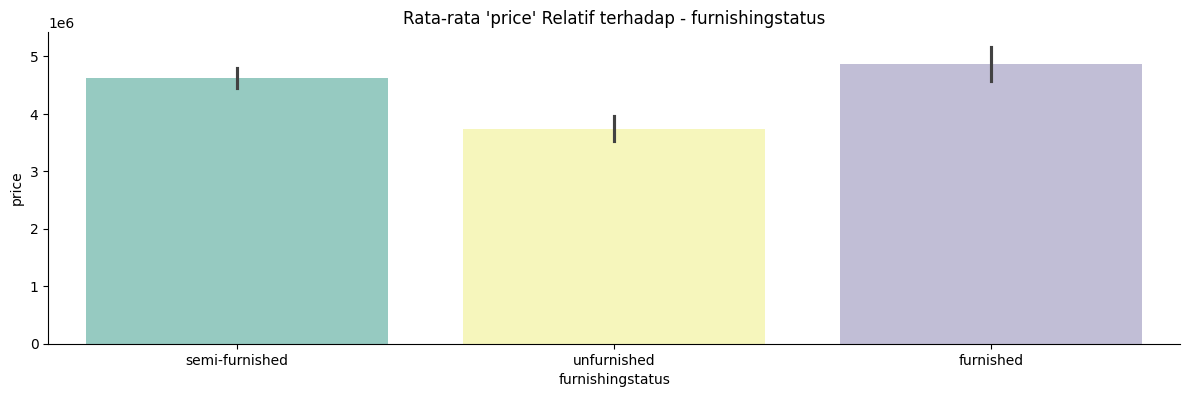

In [ ]:
cat_features = house.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=house, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

INSIGHT:

Dapat diketahui secara jelas bahwa rumah dengan posisi yang berada di jalan utama, memiliki kamar tamu, memiliki basement, pemanas air, pendingin ruangan,  berada di area yang diinginkan, dan full furnished konsisten memiliki harga yang lebih tinggi dibandingkan yang tidak memiliki faktor-faktor tersebut.

Multivariate analysis fitur numeric

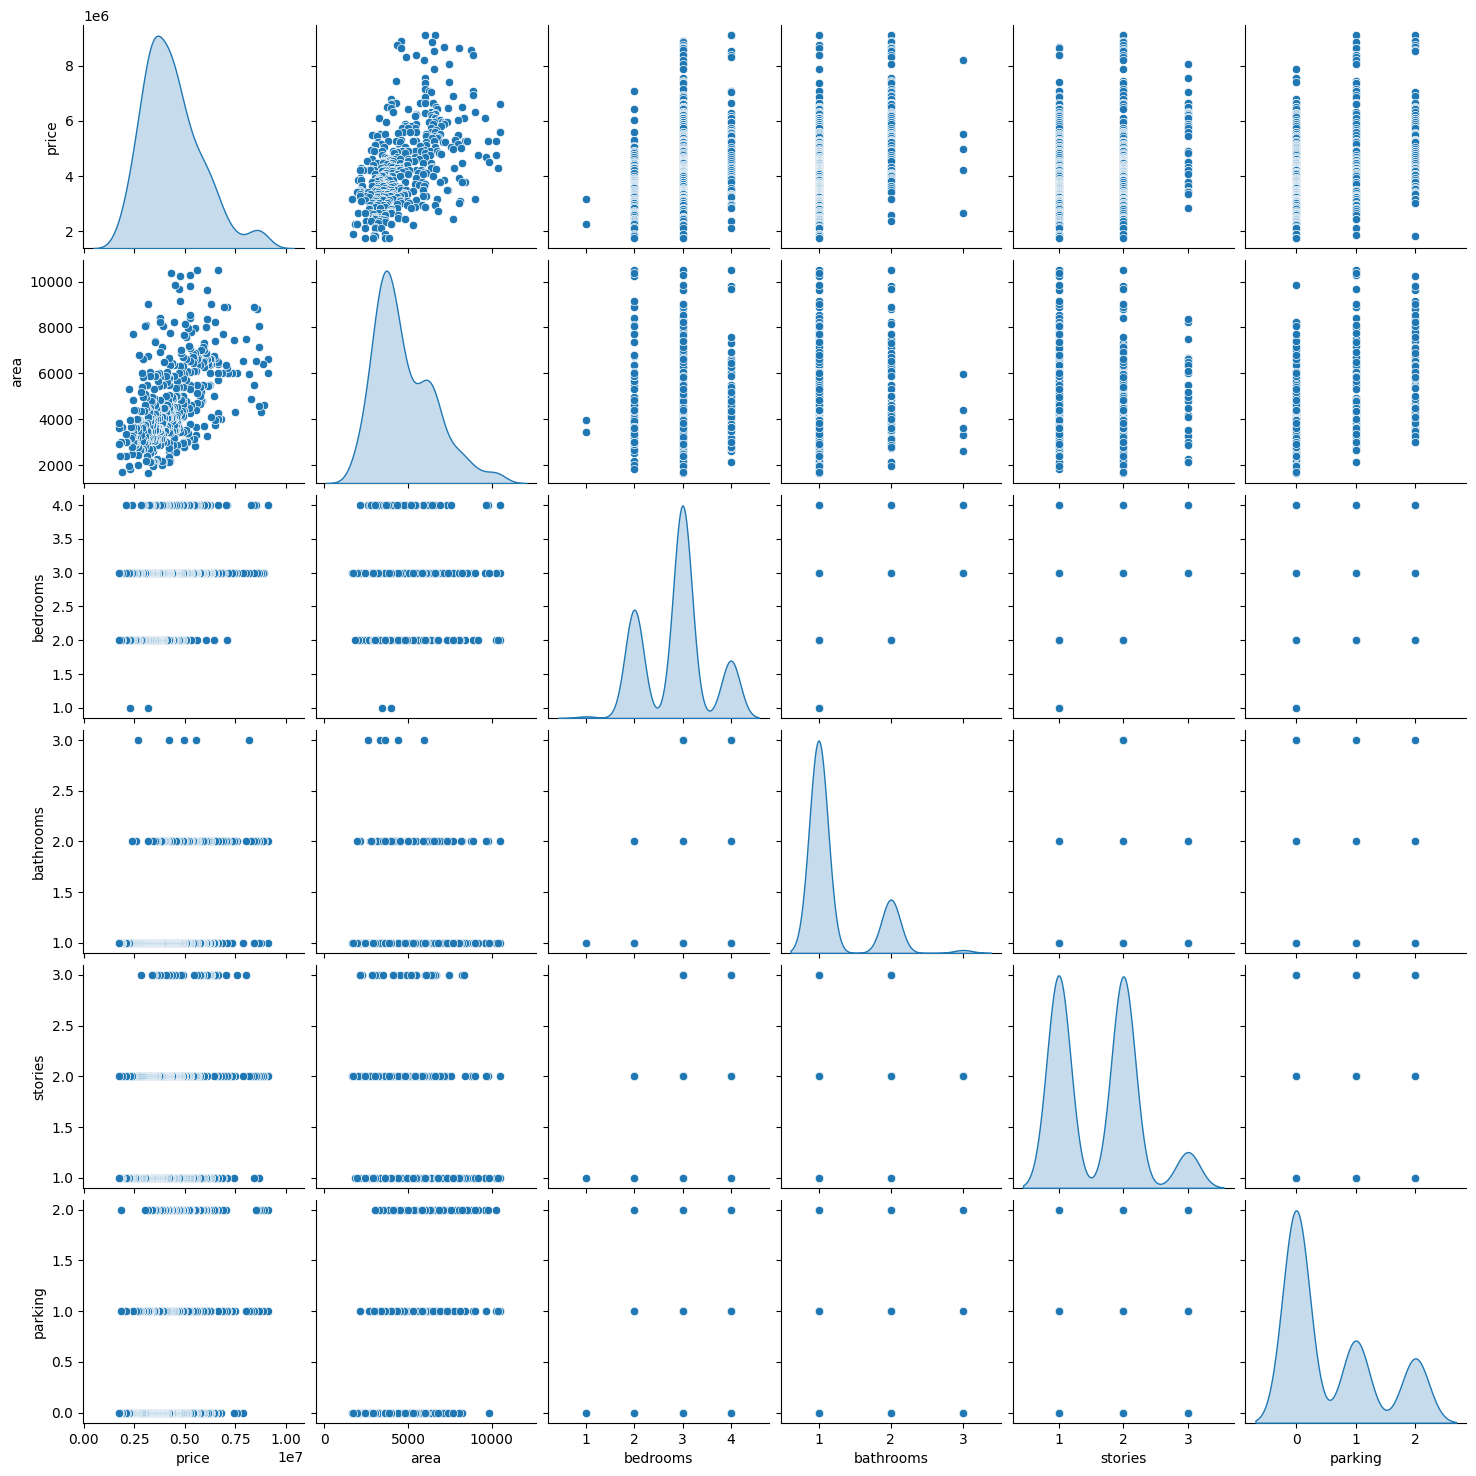

In [ ]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(house, diag_kind = 'kde')

INSIGHT:

terlihat jelas hubungan antara harga dengan area konsisten meningkat secara linear, sedangkan dengan fitur fitur lainnya cenderung diskrit, ini bisa dilihat dari visualisasi garis-garis vertikal karena banyak data menumpuk di titik x yang sama. Selain itu meskipun outlier sudah di atasi, distribusi price masih terlihat tidak normal, mencuat tinggi di kisaran 8 juta dan menurun tajam ke kanan. Artinya masih ada sebagian kecil rumah dengan harga sangat tinggi.

Beberapa algoritma seperti linear regression bisa terlalu terdorong oleh outlier rumah yang terlalu mahal dan dapat disimpulkan bahwa perlu adanya transformasi agar mendekati distribusi normal pada kolom target. Selain itu kondisi fitur lainnya yang diskrit membuat terkadang model linier kesulitan kalau tidak ada variasi cukup, atau jika makna angka tidak linier (misal, selisih antara 1 dan 2 parkir tidak sama dampaknya dengan 3 dan 4). Dari kondisi tersebut model seperti tree based cenderung lebih cocok seperti random forest maupun adaboost. Meskipun demikian, linear regression akan tetap dicoba dengan proses scaling dan akan dibandingkan hasilnya dengan model random forest serta adaboost. Selain itu, berdasarkan analisis yang dilakukan pada univariate maupun multivariate analysis, dapat diketahui bahwa dataset yang digunakan cenderung memiliki harga rumah yang rendah dan sangat sedikit rumah yang memiliki harga sangat tinggi (outlier), hal ini dapat disimpulkan bahwa MAE lebih cocok digunakan untuk matriks evaluasinya, sebab cenderung lebih adil dan dapat menunjukan apakah model ini lebih baik secara rata-rata umum atau tidak.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

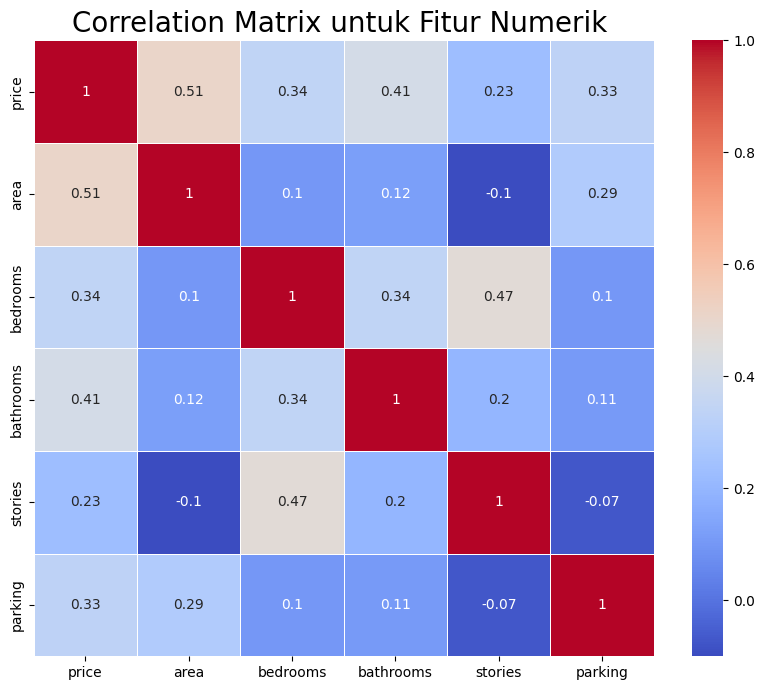

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = house[numerical_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

INSIGHT:

Semua fitur numeric yang ada terlihat memiliki kontribusi atau korelasi terhadap target, meskipun tidak ada yang sangat dominan korelasinya, namun tidak ada yang berada dibawah 0. dan apabila dilihat dari visualisasi barchart sebelumnya pada multivariate analysis fitur categorical bisa dilihat juga bahwa fitur fitur tersebut selaras dengan harga, semakin lengkap fasilitas terpenuhi, semakin tinggi juga harga rumahnya. Maka dapat diputuskan bahwa semua fitur akan digunakan untuk melatih model kecuali kolom price (target)

# Data preparation

Menghapus outlier

In [ ]:
# Ambil hanya kolom numerikal
numeric_cols = house.select_dtypes(include='number').columns
# Hitung Q1, Q3, dan IQR hanya untuk kolom numerikal
Q1 = house[numeric_cols].quantile(0.25)
Q3 = house[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
# Buat filter untuk menghapus baris yang mengandung outlier di kolom numerikal
filter_outliers = ~((house[numeric_cols] < (Q1 - 1.5 * IQR)) |
                    (house[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
# Terapkan filter ke dataset asli (termasuk kolom non-numerikal)
house = house[filter_outliers]
# Cek ukuran dataset setelah outlier dihapus
house.shape

(463, 13)

Encoding fitur categorical

In [ ]:

house = pd.concat([house, pd.get_dummies(house['mainroad'], prefix='mainroad')],axis=1)
house = pd.concat([house, pd.get_dummies(house['guestroom'], prefix='guestroom')],axis=1)
house = pd.concat([house, pd.get_dummies(house['basement'], prefix='basement')],axis=1)
house = pd.concat([house, pd.get_dummies(house['hotwaterheating'], prefix='hotwaterheating')],axis=1)
house = pd.concat([house, pd.get_dummies(house['airconditioning'], prefix='airconditioning')],axis=1)
house = pd.concat([house, pd.get_dummies(house['prefarea'], prefix='prefarea')],axis=1)
house = pd.concat([house, pd.get_dummies(house['furnishingstatus'], prefix='furnishingstatus')],axis=1)

house.drop(['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'], axis=1, inplace=True)

house.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,9100000,6000,4,1,2,2,False,True,True,False,...,True,True,False,True,False,True,False,False,True,False
16,9100000,6600,4,2,2,1,False,True,False,True,...,True,True,False,False,True,False,True,False,False,True
18,8890000,4600,3,2,2,2,False,True,False,True,...,False,True,False,False,True,True,False,True,False,False
19,8855000,6420,3,2,2,1,False,True,True,False,...,False,True,False,False,True,False,True,False,True,False
20,8750000,4320,3,1,2,2,False,True,True,False,...,True,False,True,True,False,True,False,False,True,False


In [ ]:
for col in house.columns:
    if house[col].dtype == 'bool':
        house[col] = house[col].astype(int)

In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 463 entries, 15 to 544
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            463 non-null    int64
 1   area                             463 non-null    int64
 2   bedrooms                         463 non-null    int64
 3   bathrooms                        463 non-null    int64
 4   stories                          463 non-null    int64
 5   parking                          463 non-null    int64
 6   mainroad_no                      463 non-null    int64
 7   mainroad_yes                     463 non-null    int64
 8   guestroom_no                     463 non-null    int64
 9   guestroom_yes                    463 non-null    int64
 10  basement_no                      463 non-null    int64
 11  basement_yes                     463 non-null    int64
 12  hotwaterheating_no               463 non-null    int64

Split dataset

In [ ]:
X = house.drop(["price"],axis =1)
y = house["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 463
Total # of sample in train dataset: 416
Total # of sample in test dataset: 47


Standarisasi data latih

In [ ]:
numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,area,bedrooms,bathrooms,stories,parking
67,1.612540,0.246073,1.828100,-0.980416,1.872746
513,-0.199758,0.246073,-0.490466,0.644497,-0.750359
184,-0.968612,0.246073,1.828100,0.644497,-0.750359
183,1.766311,0.246073,-0.490466,-0.980416,0.561193
272,-0.378242,0.246073,-0.490466,-0.980416,1.872746


In [ ]:
X_train[numerical_features].describe().round(4)

,area,bedrooms,bathrooms,stories,parking
count,416.0000,416.0000,416.0000,416.0000,416.0000
mean,0.0000,0.0000,0.0000,0.0000,0.0000
std,1.0012,1.0012,1.0012,1.0012,1.0012
min,-1.6825,-2.8096,-0.4905,-0.9804,-0.7504
25%,-0.7050,-1.2818,-0.4905,-0.9804,-0.7504
50%,-0.2766,0.2461,-0.4905,0.6445,-0.7504
75%,0.6789,0.2461,-0.4905,0.6445,0.5612
max,3.1502,1.7739,4.1467,2.2694,1.8727


In [ ]:
y_train_log = np.log1p(y_train)

# Model development

In [ ]:
models = pd.DataFrame(index=['train_mae','test_mae'],
                      columns=['LinearRegression', 'RandomForest', 'AdaBoost'])

Logistic Regression

In [ ]:
LR = LinearRegression()
LR.fit(X_train, y_train_log)
y_pred_log = LR.predict(X_train)
y_pred = np.expm1(y_pred_log)
mae = mean_absolute_error(y_train, y_pred)

models.loc['train_mae','LinearRegression'] = mae

Random forest dengan hyperparameter tunning

In [ ]:
base_model = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


random_search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

random_search.fit(X_train, y_train_log)

best_rf = random_search.best_estimator_

y_pred_log = best_rf.predict(X_train)
y_pred = np.expm1(y_pred_log)

mae = mean_absolute_error(y_train, y_pred)

models.loc['train_mae', 'RandomForest'] = mae

print("Best Parameters for Random Forest:", random_search.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
35 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

Best Parameters for Random Forest: {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}


AdaBoost dengan hyperparameter tunning

In [ ]:
base_model = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(),
    random_state=42
)


param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5, 1.0],
    'estimator__max_depth': [1, 2, 3, 5, 7],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4],
}


random_search = RandomizedSearchCV(
    base_model,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

random_search.fit(X_train, y_train_log)

best_adaboost = random_search.best_estimator_

y_pred_log = best_adaboost.predict(X_train)
y_pred = np.expm1(y_pred_log)

mae = mean_absolute_error(y_train, y_pred)

models.loc['train_mae', 'AdaBoost_Tuned'] = mae

print("Best Parameters for AdaBoost:", random_search.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters for AdaBoost: {'n_estimators': 50, 'learning_rate': 0.01, 'estimator__min_samples_split': 10, 'estimator__min_samples_leaf': 1, 'estimator__max_depth': 7}


# Evaluasi

In [ ]:
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [ ]:
models = pd.DataFrame(index=[ 'train_mae', 'test_mae'],
                      columns=['LinearRegression', 'RandomForest', 'AdaBoost'])

model_dict = {
    'LinearRegression': LR,
    'RandomForest': best_rf,
    'AdaBoost': best_adaboost
}

for name, model in model_dict.items():

    y_pred_train_log = model.predict(X_train)
    y_pred_test_log = model.predict(X_test)
    y_pred_train = np.expm1(y_pred_train_log)
    y_pred_test = np.expm1(y_pred_test_log)

    models.loc['train_mae', name] = mean_absolute_error(y_train, y_pred_train)
    models.loc['test_mae', name] = mean_absolute_error(y_test, y_pred_test)

print(models)

          LinearRegression   RandomForest       AdaBoost
train_mae    685947.065865   538718.73195   433662.30811
test_mae     622031.295643  596380.092014  548786.736431


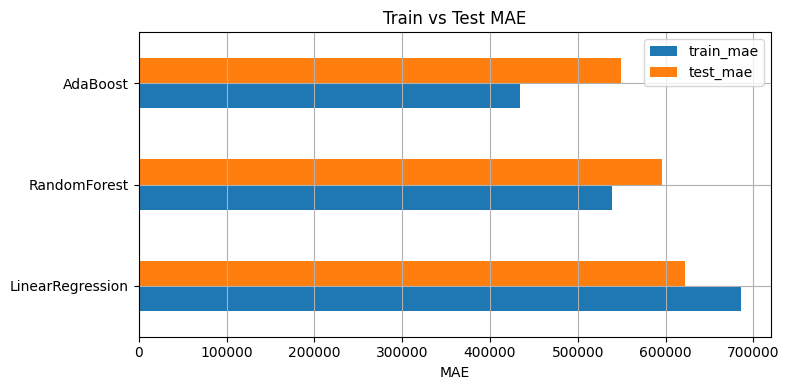

In [ ]:
# Visualisasi train vs test MAE
fig, ax = plt.subplots(figsize=(8,4))
models.loc[['train_mae', 'test_mae']].T.plot(kind='barh', ax=ax)
ax.set_title("Train vs Test MAE")
ax.set_xlabel("MAE")
ax.grid(True)
plt.tight_layout()
plt.show()

INSIGHT:

Berdasarkan hasil tersebut, model AdaBoost ternyata merupakan model terbaik dengan nilai mean absolut error (MAE) pada proses training sebesar 433662.30811 dan testing sebesar 548786.736431, nilai ini lebih rendah dibandingkan dua model lainnya, baik pada saat proses training maupun proses testing. Model random forest memiliki nilai MAE sebesar 538718.73195 pada training dan 596380.0920 pada testing, sedangkan model linear regression memiliki nilai MAE sebesar 685947.065865 pada training dan 622031.295643 pada testing. Sehingga dapat diketahui bahwa model AdaBoost mampu memprediksi harga rumah dengan error rata rata secara umum yang paling baik dibandingkan random forest maupun linear regression, serta model Adaboost inilah yang akan dipilih untuk digunakan dalam memprediksi harga rumah.

Pengujian beberapa harga pada datsaset

In [ ]:
# Ambil satu data untuk membandingkan hasil prediksi
prediksi = X_test.iloc[:5].copy()
y_true_subset = y_test.iloc[:5]

# Buat dictionary untuk menyimpan hasil prediksi
pred_dict = {'y_true': y_true_subset.values}

for name, model in model_dict.items():
    y_pred_log = model.predict(prediksi)
    y_pred = np.expm1(y_pred_log)
    pred_dict['prediksi_' + name] = np.round(y_pred, 1)

# Tampilkan sebagai DataFrame
pd.DataFrame(pred_dict)


,y_true,prediksi_LinearRegression,prediksi_RandomForest,prediksi_AdaBoost
0,6265000,5282681.9,5286557.9,5697139.9
1,5600000,4864102.7,4032587.9,4180794.0
2,6650000,6209525.2,6447495.3,6701562.9
3,4200000,3755913.3,4177329.9,4431822.8
4,4130000,4724635.9,4706219.9,4524901.2


Terbukti, dari 5 harga yang ada pada dataset,  model AdaBoost berhasil memprediksi 3 harga asli dengan selisih paling mendekati dibandingkan dengan model lainnya.